In [1]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.plots import corner
from mejiro.utils import util

# read configuration file
with open('roman_test.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

In [2]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 12 pickle(s) in /data/bwedig/mejiro/roman_test_dev/03


In [3]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

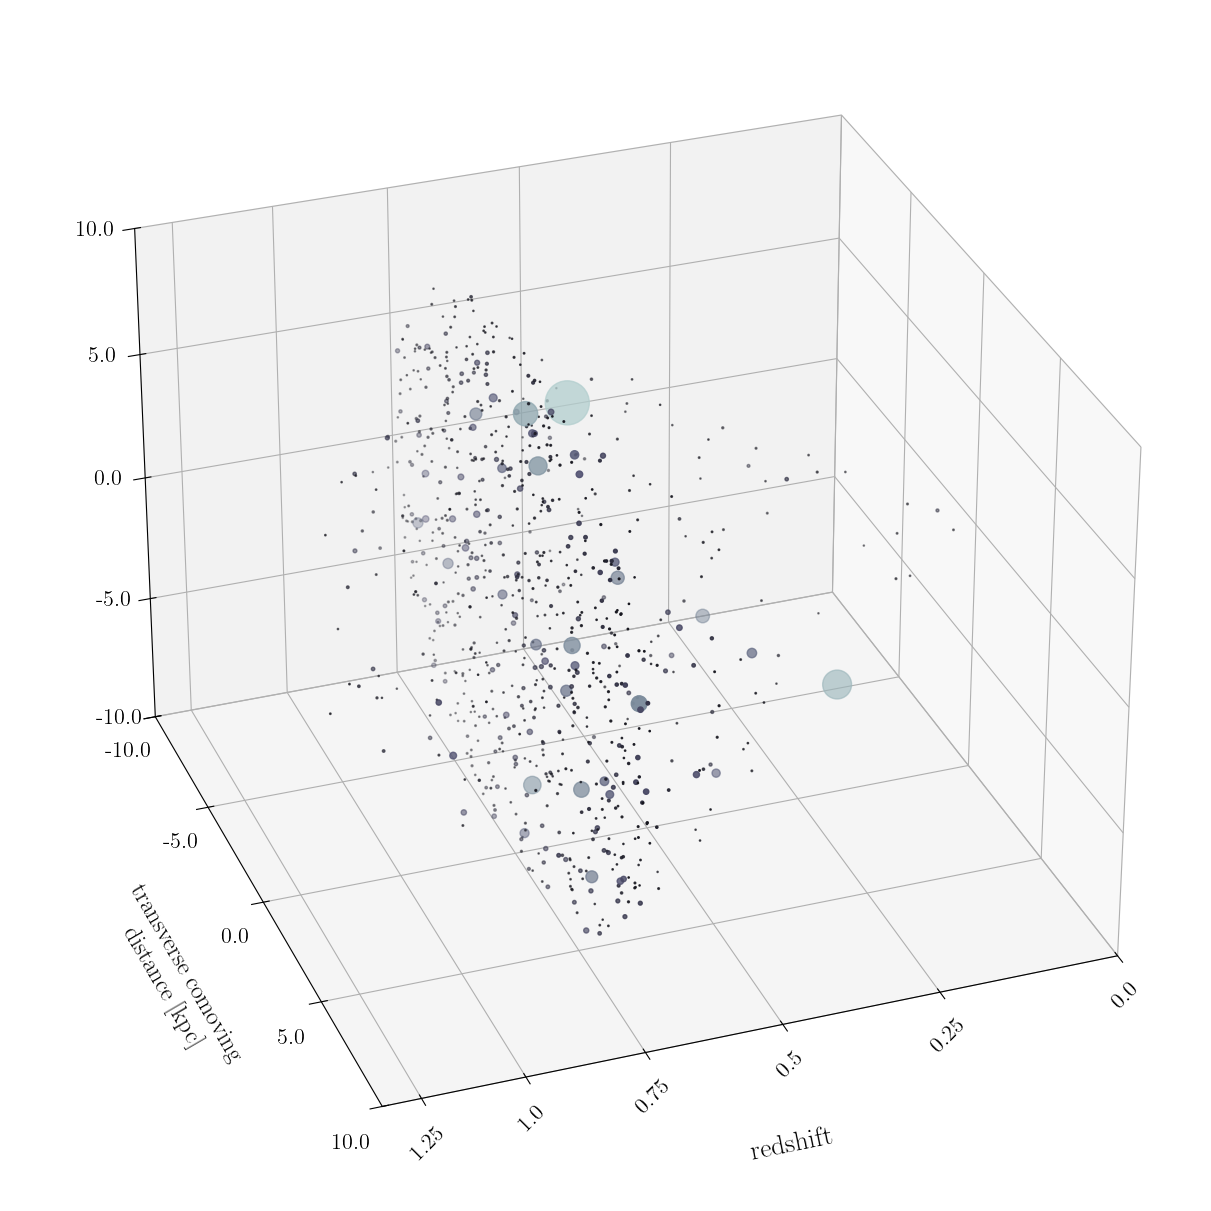

In [4]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

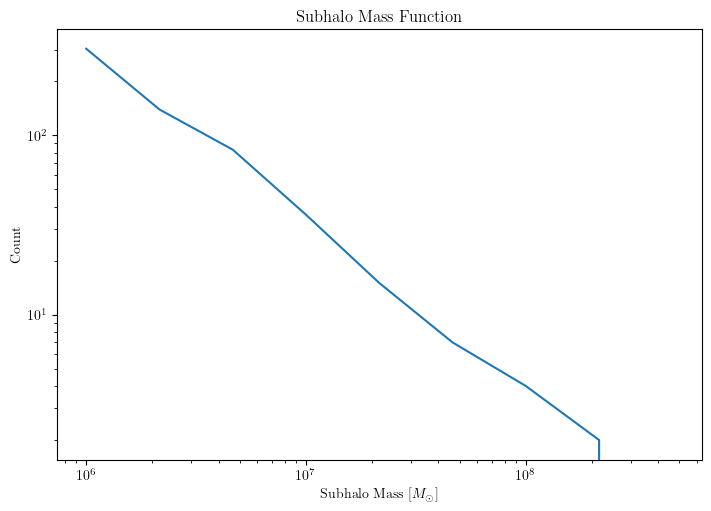

In [17]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.title('Subhalo Mass Function')
plt.xlabel('Subhalo Mass [$M_\odot$]')
plt.ylabel('Count')
plt.show()

In [6]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 1.33e+09 Msun

{'_args': {},
 '_c': 13.968702983077655,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationLudlow object at 0x7f6dc9138250>,
 '_kwargs_lenstronomy': [{'Rs': 0.1821765348,
                          'alpha_Rs': 0.0028696503,
                          'center_x': 0.0238,
                          'center_y': 0.6736,
                          'r_trunc': 4.039331347001564}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f6dc92f7d60>,
 '_nfw_params': [27105602.381095093, 1.3004991447336671, 18.166286282531118],
 '_profile_args': (13.968702983077655, 28.837181955245367),
 '_rescale_norm': 1.0,
 '_rescaled_once': False,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationRN object at 0x7f6dc91385e0>,
 '_zeval': 0.65,
 'fixed_position': False,
 'is_subhalo': False,
 'lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f6dc92f7d60>,
 'mass': 1328161686.4695356,
 'mdef': 'TNFW',
 'r3d': None,
 'tnfw_lenstro

# Review failed systems

In [8]:
lenses = util.unpickle_all(os.path.join(data_dir, 'sca*'), prefix="lens_")
print(f'Found {len(lenses)} lens(es) in {data_dir}')

Found 4661 lens(es) in /data/bwedig/mejiro/roman_test_dev/03


In [9]:
failed_lenses = util.unpickle_all(data_dir, prefix="failed_")
print(f'{len(failed_lenses)} failed out of {len(lenses)} systems, {len(failed_lenses) / len(lenses) * 100:.2f} percent')

26 failed out of 4661 systems, 0.56 percent


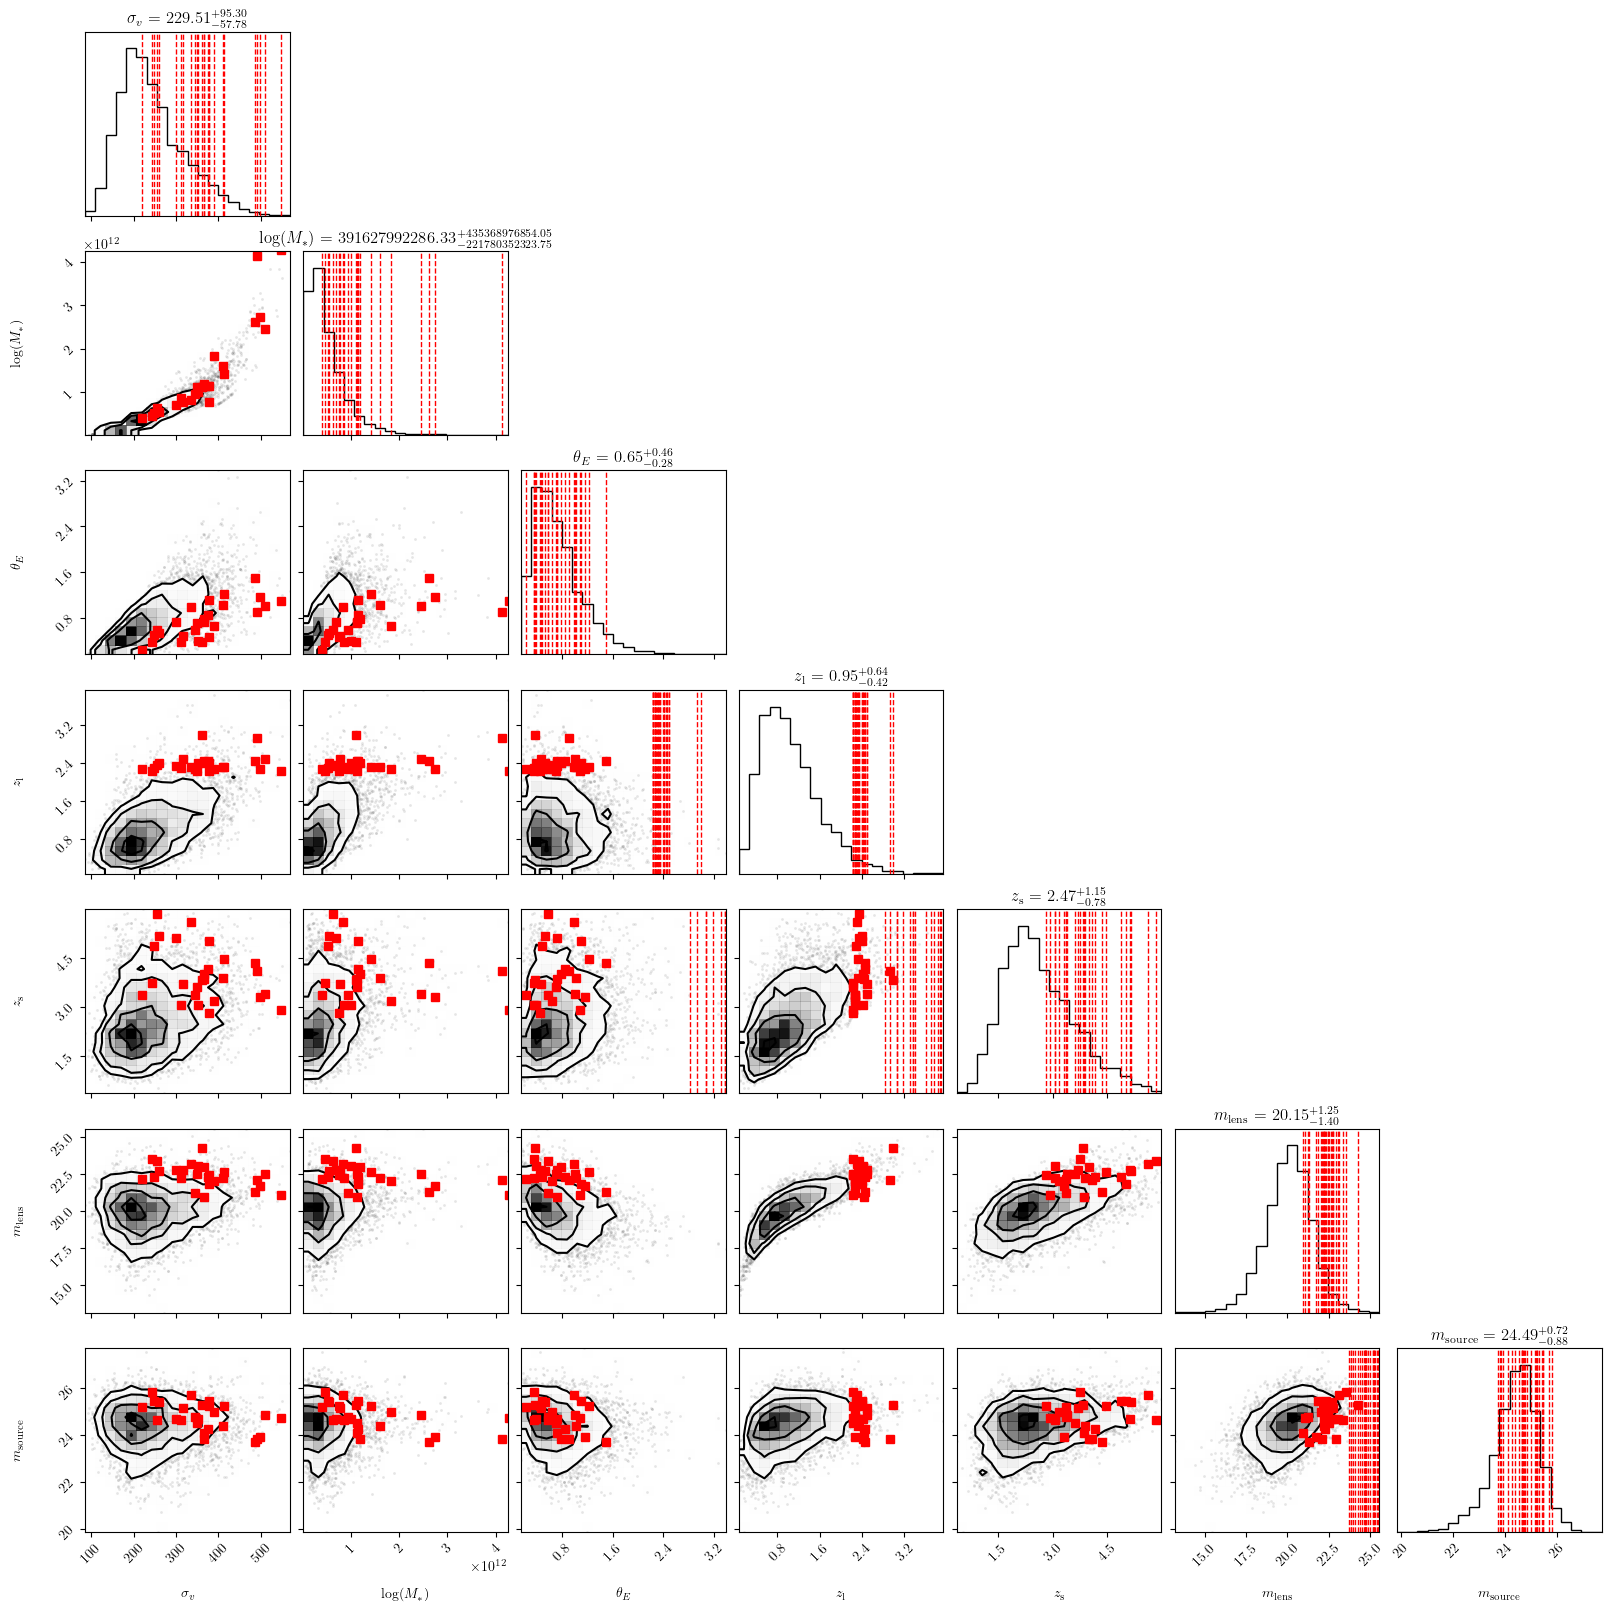

In [10]:
total_corner = corner.overview(lenses, 'F129', quantiles=None)
corner.overplot_points(total_corner, failed_lenses)